In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder  
from sklearn.naive_bayes import GaussianNB 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_iris
from sklearn.metrics import precision_recall_fscore_support

In [28]:
data = pd.read_csv("cleaned_data.csv")

In [29]:
# Map 'Yes' to 1 and 'No' to 0 in the 'Heart_Stroke' column
data['Heart_Stroke'] = data['Heart_Stroke'].map({'Yes': 1, 'No': 0})

# Label encoding for the 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Label encoding for binary categorical columns
label_encoder = LabelEncoder()
data['BPMeds'] = label_encoder.fit_transform(data['BPMeds'])
data['prevalentStroke'] = label_encoder.fit_transform(data['prevalentStroke'])
data['prevalentHyp'] = label_encoder.fit_transform(data['prevalentHyp'])

In [30]:
# One-hot encoding for the 'education' column
data = pd.get_dummies(data, columns=['education'], drop_first=True)

# Select features and target
X = data[['age', 'Gender', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'education_postgraduate', 'education_primaryschool', 'education_uneducated']]
y = data['Heart_Stroke']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Initialize the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 84.89%


In [34]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[682  29]
 [ 96  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       711
           1       0.41      0.17      0.24       116

    accuracy                           0.85       827
   macro avg       0.64      0.57      0.58       827
weighted avg       0.81      0.85      0.82       827



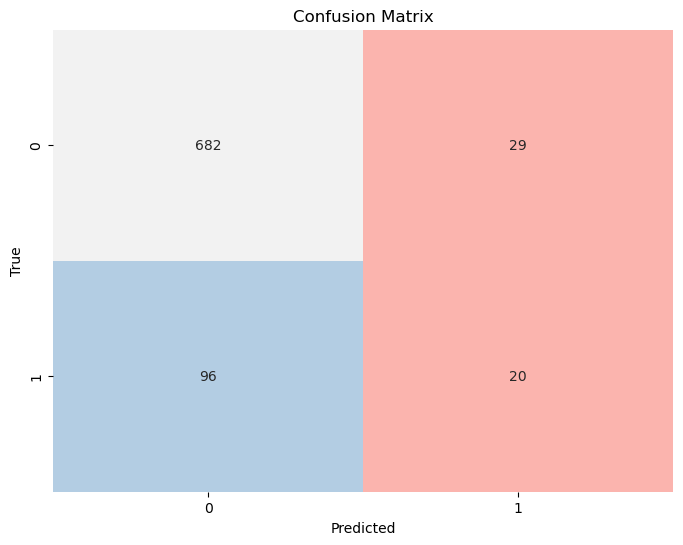

In [35]:
# Create a heatmap of the confusion matrix with the "Pastel1" colormap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Pastel1", cbar=False)  # Use the "Pastel1" colormap and disable the color bar
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

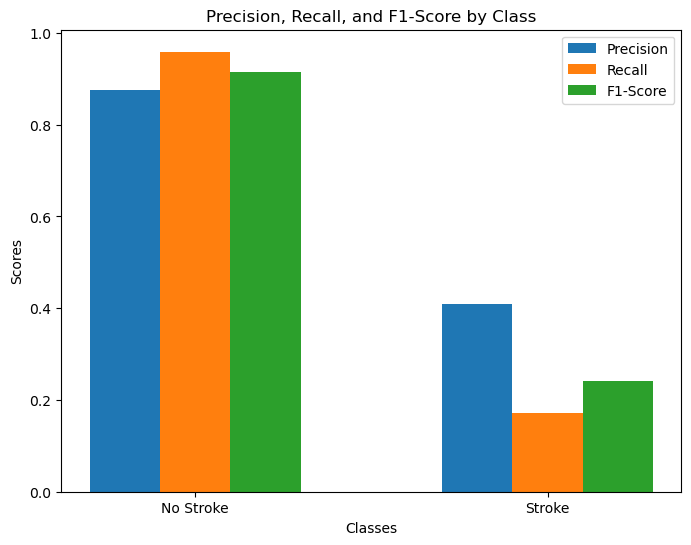

In [36]:
# Get precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
classes = ['No Stroke', 'Stroke']

# Create a bar chart to visualize precision, recall, and F1-score
plt.figure(figsize=(8, 6))
x = np.arange(len(classes))
width = 0.2

plt.bar(x - width, precision, width, label='Precision', align='center')
plt.bar(x, recall, width, label='Recall', align='center')
plt.bar(x + width, f1_score, width, label='F1-Score', align='center')

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(x, classes)
plt.legend()
plt.show()

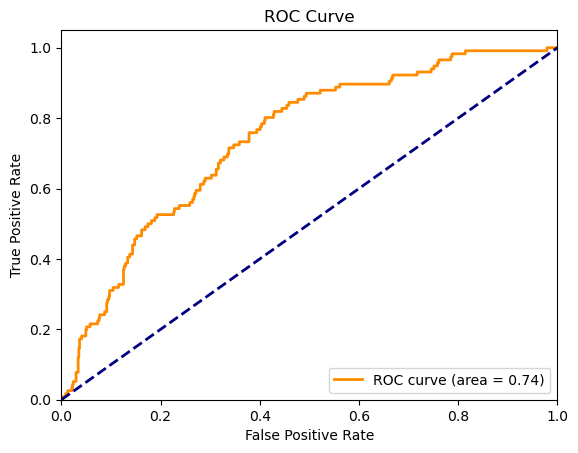

In [37]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

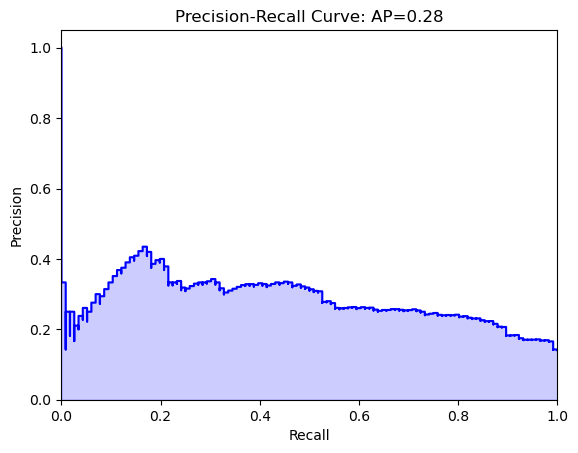

In [38]:
# Compute precision-recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, naive_bayes.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, naive_bayes.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

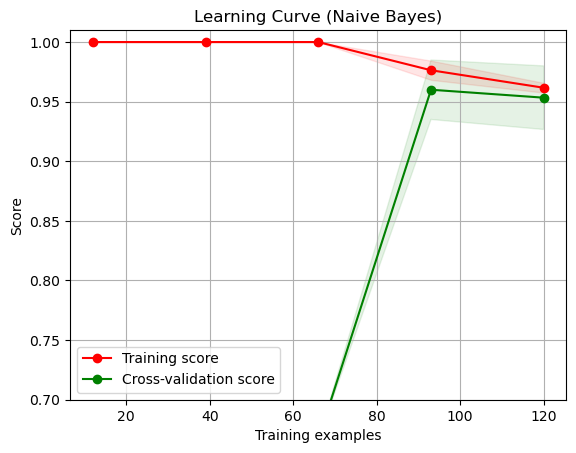

In [39]:
# Create a function to generate a learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Sample data (you should replace this with your own data)
data = load_iris()
X = data.data
y = data.target

# Define the Naive Bayes classifier
naive_bayes = GaussianNB()

# Create a learning curve
title = "Learning Curve (Naive Bayes)"
plot_learning_curve(naive_bayes, title, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=4)

plt.show()